In [5]:
import torch
from torchvision import datasets, transforms
import numpy as np
from torch.utils.data import Subset, DataLoader

@torch.no_grad()
def getDataSet(path, dataset_name, size_x, size_y, repeatData=1,
               random_vertical_flip=False, random_horizontal_flip=False,
               crop_type='random', grayscale=False, color_jitter=False, jitter_brightness=0,
               jitter_contrast=0, jitter_saturation=0, jitter_hue=0):
    """
    Loads and returns a combined dataset from specified image folders with optional transformations.

    This function combines images from multiple directories into a single dataset, with the option to apply
    various image transformations such as cropping, flipping, grayscaling, and color jitter.

    Parameters:
    - path (str): Base directory path containing the image folders.
    - dataset_name (str): Key to select specific dataset directories from the predefined dictionary.
    - size_x (int): The target width for cropping or resizing the images.
    - size_y (int): The target height for cropping or resizing the images.
    - repeatData (int, optional): The number of times to repeat the dataset. Defaults to 1.
    - enable_grayscale (bool, optional): If True, converts images to grayscale. Defaults to False.
    - enable_random_vertical_flip (bool, optional): If True, randomly flips images vertically. Defaults to True.
    - enable_random_horizontal_flip (bool, optional): If True, randomly flips images horizontally. Defaults to False.
    - crop_type (str, optional): Specifies the type of cropping ('random' or 'center'). Defaults to 'random'.
    - enable_color_jitter (bool, optional): If True, applies random color jittering to the images. Defaults to False.
    - jitter_brightness (float, optional): Brightness jittering strength. Ignored if enable_color_jitter is False. Defaults to 0.
    - jitter_contrast (float, optional): Contrast jittering strength. Ignored if enable_color_jitter is False. Defaults to 0.
    - jitter_saturation (float, optional): Saturation jittering strength. Ignored if enable_color_jitter is False. Defaults to 0.
    - jitter_hue (float, optional): Hue jittering strength. Ignored if enable_color_jitter is False. Defaults to 0.

    Returns:
    - combined_dataset: A torch.utils.data.Dataset instance containing the combined and optionally transformed dataset.
    
    Raises:
    - ValueError: If the specified dataset_name is not found in the predefined dictionary of datasets.
    """


    DataDic = {
        "AllData_x1024": [  
            'Data_Abzu/x1024',
            'Data_BatmanArkhamKnight/x1024',
            'Data_BioShockInf/x1024',
            'Data_Borderlands/x1024',
            'Data_Borderlands2/x1024',
            'Data_BrothersATOTS/x1024',
            'Data_CitiesSkylines/x1024',
            'Data_CsGo/x1024',
            'Data_Dauntless/x1024',
            'Data_Dishonored/x1024',
            'Data_Freepbr1k/x1024',
            'Data_GarrysMod/x1024',
            'Data_HalfLife2/x1024',
            'Data_Left4Dead2/x1024',
            'Data_Maneater/x1024',
            'Data_Minecraft/x1024',
            'Data_MutantYearZeroRTE/x1024',
            'Data_Phasmophobia/x1024',
            'Data_Poliigon/x1024',
            'Data_Polyhaven1k/x1024',
            'Data_Portal2/x1024',
            'Data_Relicta/x1024',
            'Data_RemnantFromTheAshes/x1024',
            'Data_Ruiner/x1024',
            'Data_StarWarsJFO/x1024',
            'Data_TeamFortress2/x1024',
            'Data_TrainSimWorld/x1024',
            'Data_TrainSimWorld2/x1024',
            'Data_UnityAssets/x1024',
            'Data_Vampyr/x1024',
            'Data_XCOM/x1024',
            'Data_XCOM2/x1024'],
        "AllData_x512": [
            'Data_Abzu/x512',
            'Data_BatmanArkhamKnight/x512',
            'Data_BioShockInf/x512',
            'Data_Borderlands/x512',
            'Data_Borderlands2/x512',
            'Data_BrothersATOTS/x512',
            'Data_CitiesSkylines/x512',
            'Data_CsGo/x512',
            'Data_Dauntless/x512',
            'Data_Dishonored/x512',
            'Data_Freepbr1k/x512',
            'Data_GarrysMod/x512',
            'Data_HalfLife2/x512',
            'Data_Left4Dead2/x512',
            'Data_Maneater/x512',
            'Data_Minecraft/x512',
            'Data_MutantYearZeroRTE/x512',
            'Data_OperatorNdmQG/x512',
            'Data_Phasmophobia/x512',
            'Data_Poliigon/x512',
            'Data_Polyhaven1k/x512',
            'Data_Portal/x512',
            'Data_Portal2/x512',
            'Data_Relicta/x512',
            'Data_RemnantFromTheAshes/x512',
            'Data_Ruiner/x512',
            'Data_StarWarsJFO/x512',
            'Data_TeamFortress2/x512',
            'Data_TrainSimWorld/x512',
            'Data_TrainSimWorld2/x512',
            'Data_UnityAssets/x512',
            'Data_Vampyr/x512',
            'Data_XCOM/x512',
            'Data_XCOM2/x512'],

        'Abzu_x1024' : ['Data_Abzu/x1024'],
        'BatmanArkhamKnight_x1024'  : ['Data_BatmanArkhamKnight/x1024'],
        'BioShockInf_x1024' : ['Data_BioShockInf/x1024'],
        'Borderlands_x1024' : ['Data_Borderlands/x1024'],
        'Borderlands2_x1024'  : ['Data_Borderlands2/x1024'],
        'BrothersATOTS_x1024'  : ['Data_BrothersATOTS/x1024'],
        'CitiesSkylines_x1024' : ['Data_CitiesSkylines/x1024'],
        'CsGo_x1024' : ['Data_CsGo/x1024'],
        'Dauntless_x1024' : ['Data_Dauntless/x1024'],
        'Dishonored_x1024' : ['Data_Dishonored/x1024'],
        'Freepbr1k_x1024' : ['Data_Freepbr1k/x1024'],
        'GarrysMod_x1024' : ['Data_GarrysMod/x1024'],
        'HalfLife2_x1024' : ['Data_HalfLife2/x1024'],
        'Left4Dead2_x1024' : ['Data_Left4Dead2/x1024'],
        'Maneater_x1024' : ['Data_Maneater/x1024'],
        'Minecraft_x1024' : ['Data_Minecraft/x1024'],
        'MutantYearZeroRTE_x1024'  : ['Data_MutantYearZeroRTE/x1024'],
        'Phasmophobia_x1024' : ['Data_Phasmophobia/x1024'],
        'Poliigon_x1024' : ['Data_Poliigon/x1024'],
        'Polyhaven1k_x1024' : ['Data_Polyhaven1k/x1024'],
        'Portal2_x1024' : ['Data_Portal2/x1024'],
        'Relicta_x1024' : ['Data_Relicta/x1024'],
        'RemnantFromTheAshes_x1024'  : ['Data_RemnantFromTheAshes/x1024'],
        'Ruiner_x1024' : ['Data_Ruiner/x1024'],
        'StarWarsJFO_x1024' : ['Data_StarWarsJFO/x1024'],
        'TeamFortress2_x1024'  : ['Data_TeamFortress2/x1024'],
        'TrainSimWorld_x1024'  : ['Data_TrainSimWorld/x1024'],
        'TrainSimWorld2_x1024'  : ['Data_TrainSimWorld2/x1024'],
        'UnityAssets_x1024' : ['Data_UnityAssets/x1024'],
        'Vampyr_x1024' : ['Data_Vampyr/x1024'],
        'XCOM_x1024' : ['Data_XCOM/x1024'],
        'XCOM2_x1024' : ['Data_XCOM2/x1024'],
            
        'Abzu_x512' : ['Data_Abzu/x512'],
        'BatmanArkhamKnight_x512'  : ['Data_BatmanArkhamKnight/x512'],
        'BioShockInf_x512' : ['Data_BioShockInf/x512'],
        'Borderlands_x512' : ['Data_Borderlands/x512'],
        'Borderlands2_x512'  : ['Data_Borderlands2/x512'],
        'BrothersATOTS_x512'  : ['Data_BrothersATOTS/x512'],
        'CitiesSkylines_x512' : ['Data_CitiesSkylines/x512'],
        'CsGo_x512' : ['Data_CsGo/x512'],
        'Dauntless_x512' : ['Data_Dauntless/x512'],
        'Dishonored_x512' : ['Data_Dishonored/x512'],
        'Freepbr1k_x512' : ['Data_Freepbr1k/x512'],
        'GarrysMod_x512' : ['Data_GarrysMod/x512'],
        'HalfLife2_x512' : ['Data_HalfLife2/x512'],
        'Left4Dead2_x512' : ['Data_Left4Dead2/x512'],
        'Maneater_x512' : ['Data_Maneater/x512'],
        'Minecraft_x512' : ['Data_Minecraft/x512'],
        'MutantYearZeroRTE_x512'  : ['Data_MutantYearZeroRTE/x512'],
        'OperatorNdmQG_x512' : ['Data_OperatorNdmQG/x512'],
        'Phasmophobia_x512' : ['Data_Phasmophobia/x512'],
        'Poliigon_x512' : ['Data_Poliigon/x512'],
        'Polyhaven1k_x512' : ['Data_Polyhaven1k/x512'],
        'Portal_x512' : ['Data_Portal/x512'],
        'Portal2_x512' : ['Data_Portal2/x512'],
        'Relicta_x512' : ['Data_Relicta/x512'],
        'RemnantFromTheAshes_x512'  : ['Data_RemnantFromTheAshes/x512'],
        'Ruiner_x512' : ['Data_Ruiner/x512'],
        'StarWarsJFO_x512' : ['Data_StarWarsJFO/x512'],
        'TeamFortress2_x512'  : ['Data_TeamFortress2/x512'],
        'TrainSimWorld_x512'  : ['Data_TrainSimWorld/x512'],
        'TrainSimWorld2_x512'  : ['Data_TrainSimWorld2/x512'],
        'UnityAssets_x512' : ['Data_UnityAssets/x512'],
        'Vampyr_x512' : ['Data_Vampyr/x512'],
        'XCOM_x512' : ['Data_XCOM/x512'],
        'XCOM2_x512' : ['Data_XCOM2/x512'],
    }

    if dataset_name not in DataDic:
        raise ValueError(f"Dataset'{dataset_name}' is not in DataDic")

    selected_data_paths = [f"{path}/{folder}" for folder in DataDic[dataset_name]]

    transform_list = []

    if grayscale:
        transform_list.append(transforms.Grayscale())

    if crop_type == 'random':
        transform_list.append(transforms.RandomCrop((size_x, size_y)))
    elif crop_type == 'center':
        transform_list.append(transforms.CenterCrop((size_x, size_y)))

    if random_horizontal_flip:
        transform_list.append(transforms.RandomHorizontalFlip())

    if random_vertical_flip:
        transform_list.append(transforms.RandomVerticalFlip())

    if color_jitter:
        transform_list.append(transforms.ColorJitter(brightness=jitter_brightness, contrast=jitter_contrast,
                                                      saturation=jitter_saturation, hue=jitter_hue))

    transform_list.append(transforms.ToTensor())

    transform = transforms.Compose(transform_list)

    datasets_list = []

    for folder_path in selected_data_paths: 
        dataset = datasets.ImageFolder(root=folder_path, transform=transform)
        datasets_list.append(dataset)

    combined_dataset = torch.utils.data.ConcatDataset(datasets_list * repeatData)

    return combined_dataset

In [6]:

import os
if os.name == 'posix':
    path = "/scratch/usr/nwmdgthk/allData/Data/"
else:
    path = r"C:\Users\Dennis\Desktop\Pro\AITest\imgGen\Data"

dataset = getDataSet(path, "AllData_x512", 1024, 1024, 1)
len(dataset)    

57454

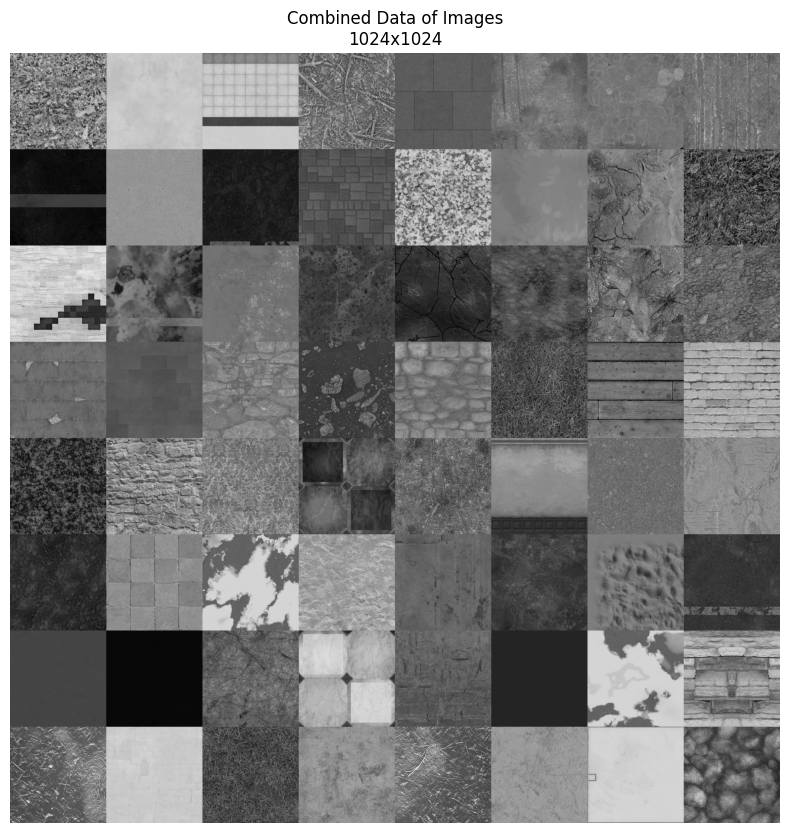

In [10]:
from PIL import Image
import matplotlib.pyplot as plt

if os.name == 'posix':
    path = "/scratch/usr/nwmdgthk/allData/Data/"
else:
    path = r"C:\Users\Dennis\Desktop\Pro\AITest\imgGen\Data"

img_size = 1024
grid_size = 8
dataset = getDataSet(path, "AllData_x1024", img_size, img_size, repeatData=1,
               random_vertical_flip=True, random_horizontal_flip=False,
               crop_type='random', grayscale=True, color_jitter=False, jitter_brightness=0,
               jitter_contrast=0, jitter_saturation=0, jitter_hue=0)

dataloader = torch.utils.data.DataLoader(dataset, batch_size=1, shuffle=True)
canvas_size = (img_size * grid_size, img_size * grid_size)
canvas = Image.new('RGB', canvas_size)

for i, (image, _) in enumerate(dataloader):
    if i >= grid_size * grid_size:  # Only process the first 64 images
        break
    if not isinstance(image, Image.Image):
        image = transforms.ToPILImage()(image.squeeze(0))  # Adjust for batch dimension
    row, col = divmod(i, grid_size)
    position = (col * img_size, row * img_size)
    canvas.paste(image, position)

plt.figure(figsize=(10, 10))  # Adjust the figure size as needed
plt.imshow(canvas)
plt.axis('off')  # Hide the axis
plt.title(f"Combined Data of Images\n{img_size}x{img_size}")
plt.show()
